# Sınıflandırma Metrikleri

Son notebook'ta hastaların diyabetli olup olmadığını tahmin etmek için ikili bir sınıflandırıcı kullandık. Modelin ne kadar iyi performans gösterdiğinin bir ölçüsü olarak *doğruluk* (accuracy) metriğini kullandık - yani kaç vakanın doğru tahmin edildiğinin oranını. Ancak doğruluk her şey değildir. Bu notebook'ta, makine öğrenmesinde çok daha yararlı olabilecek doğruluğa alternatif metriklere bakacağız.

## İkili sınıflandırıcılar için alternatif metrikler

Doğruluk değerlendirmek için mantıklı bir metrik gibi görünüyor (ve bir dereceye kadar öyle de), ancak bir sınıflandırıcının doğruluğundan çok fazla sonuç çıkarma konusunda dikkatli olmanız gerekiyor. Diyelim ki nüfusun sadece %3'ü diyabetli. Her zaman 0 tahmin eden bir sınıflandırıcı oluşturabilirsiniz ve bu %97 doğru olur - ama diyabetli hastaları belirlemede pek yardımcı olmaz!

Neyse ki, modelimizin nasıl performans gösterdiği hakkında daha fazla bilgi veren başka metrikler var. Scikit-Learn, ham doğruluktan daha fazla içgörü sağlayan bir *sınıflandırma raporu* (classification report) oluşturma yeteneğini içerir.

Başlamak için, verilerimizi yüklemek ve modelimizi geçen seferki gibi eğitmek için bir sonraki hücreyi çalıştırın.

In [14]:
# pandas ve matplotlib kütüphanelerini ekle
import pandas as pd
import matplotlib.pyplot as plt
# Jupyter içinde grafiklerin gösterilmesi için
%matplotlib inline

# sklearn'den veri ayırma ve doğruluk ölçümü fonksiyonlarını al
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veriyi csv dosyasından oku
diabetes = pd.read_csv('diabetes.csv')

# Kullanacağımız özellikler ve hedef değişkeni belirle
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
            'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'

# Özellikleri (X) ve hedefi (y) ayır
X, y = diabetes[features].values, diabetes[label].values

# Veriyi eğitim (%70) ve test (%30) olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Eğitim ve test veri sayısını yazdır
print(f"Training cases: {X_train.shape[0]}\n Testing cases: {X_test.shape[0]}")

# Lojistik regresyon modelini al
from sklearn.linear_model import LogisticRegression

# Regülerizasyon parametresi (küçük değer → güçlü regülerizasyon)
reg = 0.01

# Modeli oluştur ve eğit
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

# Test verisi için tahmin yap
pred = model.predict(X_test)

# Tahmin edilen ve gerçek etiketleri yazdır
print(f"Predicted labels: {pred}")
print(f"Actual labels: {y_test}")

# Modelin doğruluk oranını hesapla ve yazdır
print(f"Accuracy: {accuracy_score(y_test, pred)}")

Training cases: 10500
 Testing cases: 4500
Predicted labels: [0 0 0 ... 0 1 0]
Actual labels: [0 0 1 ... 1 1 1]
Accuracy: 0.7893333333333333


Başlangıç için en basit yerlerden biri sınıflandırma raporudur. Modelimizi değerlendirmenin bir dizi alternatif yolunu görmek için bir sonraki hücreyi çalıştırın.

In [15]:
# sklearn'den sınıflandırma raporu fonksiyonunu alıyoruz
from sklearn.metrics import classification_report

# Test sonuçlarını değerlendirip detaylı raporu yazdırıyoruz
# Rapor; precision, recall, f1-score ve destek (support) gibi metrikleri içerir
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



Sınıflandırma raporu her sınıf (0 ve 1) için aşağıdaki metrikleri içerir:

> Not: Başlık satırı değerlerle hizalanmayabilir.

* *Kesinlik (Precision)*: Modelin bu sınıf için yaptığı tahminlerin ne kadarı doğruydu?
* *Duyarlılık (Recall)*: Test veri setindeki bu sınıfın tüm örneklerinden, model kaç tanesini tanımlayabildi?
* *F1-Skoru*: Hem kesinlik hem de duyarlılığı hesaba katan ortalama bir metrik.
* *Destek (Support)*: Test veri setinde bu sınıftan kaç örnek var?

Sınıflandırma raporu ayrıca bu metrikler için ortalamalar içerir, bunlar arasında her sınıftaki vaka sayısındaki dengesizliği hesaba katan ağırlıklı ortalama da vardır.

Bu *ikili* bir sınıflandırma problemi olduğu için, ***1*** sınıfı *pozitif* olarak kabul edilir ve onun kesinlik ve duyarlılık değerleri özellikle ilginçtir - bunlar aslında şu soruları yanıtlar:

- Modelin diyabetli olduğunu tahmin ettiği tüm hastalardan kaç tanesi gerçekten diyabetli?
- Gerçekten diyabetli olan tüm hastalardan, model kaç tanesini tanımlayabildi?

Bu değerleri Scikit-Learn'deki **precision_score** ve **recall_score** metriklerini kullanarak tek başlarına alabilirsiniz (bunlar varsayılan olarak ikili sınıflandırma modeli varsayar).

In [16]:
# sklearn'den precision ve recall hesaplama fonksiyonlarını alıyoruz
from sklearn.metrics import precision_score, recall_score

# Modelin genel precision (kesinlik) skorunu yazdırıyoruz
print(f"Overall Precision: {precision_score(y_test, pred)}")

# Modelin genel recall (duyarlılık) skorunu yazdırıyoruz
print(f"Overall Recall: {recall_score(y_test, pred)}")

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


Kesinlik ve duyarlılık metrikleri dört olası tahmin sonucundan türetilir:
* *Gerçek Pozitifler (True Positives)*: Tahmin edilen etiket ve gerçek etiket her ikisi de 1'dir.
* *Yanlış Pozitifler (False Positives)*: Tahmin edilen etiket 1'dir, ancak gerçek etiket 0'dır.
* *Yanlış Negatifler (False Negatives)*: Tahmin edilen etiket 0'dır, ancak gerçek etiket 1'dir.
* *Gerçek Negatifler (True Negatives)*: Tahmin edilen etiket ve gerçek etiket her ikisi de 0'dır.

Bu metrikler genellikle test seti için tablolaştırılır ve bir *karışıklık matrisi (confusion matrix)* olarak birlikte gösterilir, bu matris aşağıdaki formu alır:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Doğru (*gerçek*) tahminlerin sol üstten sağ alta bir köşegen çizgi oluşturduğuna dikkat edin - eğer model iyi ise bu rakamlar *yanlış* tahminlerden önemli ölçüde yüksek olmalıdır.

Python'da, eğitilmiş bir sınıflandırıcı için bu değerleri bulmak için **sklearn.metrics.confusion_matrix** fonksiyonunu kullanabilirsiniz:

In [17]:
# sklearn'den karmaşıklık matrisi (confusion matrix) fonksiyonunu alıyoruz
from sklearn.metrics import confusion_matrix

# Gerçek ve tahmin edilen değerlerden karmaşıklık matrisini oluştur
cm = confusion_matrix(y_test, pred)

# Matrisi yazdır
print(cm)

[[2638  348]
 [ 600  914]]


Şimdiye kadar, modelden gelen tahminleri 1 veya 0 sınıf etiketleri olarak düşündük. Aslında, işler bundan biraz daha karmaşıktır. Lojistik regresyon gibi istatistiksel makine öğrenmesi algoritmaları *olasılık* tabanlıdır. İkili bir sınıflandırıcı tarafından gerçekte tahmin edilen şey, etiketin doğru olma olasılığı (**P(y)**) ve etiketin yanlış olma olasılığıdır (1 - **P(y)**). Tahmin edilen etiketin 1 (*P(y) > 0.5*) veya 0 (*P(y) <= 0.5*) olup olmadığına karar vermek için 0.5'lik bir eşik değeri kullanılır. Her durum için olasılık çiftlerini görmek için **predict_proba** metodunu kullanabilirsiniz:

In [18]:
# Modelin test verisi için her sınıfa ait olma olasılıklarını tahmin et
y_scores = model.predict_proba(X_test)

# Olasılıkları yazdır
print(y_scores)

[[0.81638711 0.18361289]
 [0.9626324  0.0373676 ]
 [0.80788517 0.19211483]
 ...
 [0.60701542 0.39298458]
 [0.10824186 0.89175814]
 [0.64005524 0.35994476]]


Bir tahmini 1 veya 0 olarak puanlama kararı, tahmin edilen olasılıkların karşılaştırıldığı eşik değerine bağlıdır. Eğer eşik değerini değiştirirsek, bu tahminleri etkiler; ve dolayısıyla karışıklık matrisindeki metrikleri değiştirir. Bir sınıflandırıcıyı değerlendirmenin yaygın bir yolu, olası eşik değerleri aralığı için *gerçek pozitif oranını* (duyarlılığın başka bir adıdır) ve *yanlış pozitif oranını* incelemektir. Bu oranlar daha sonra tüm olası eşik değerlerine karşı çizilerek *alıcı işletim karakteristiği (ROC)* grafiği olarak bilinen bir grafik oluşturulur, şöyle:

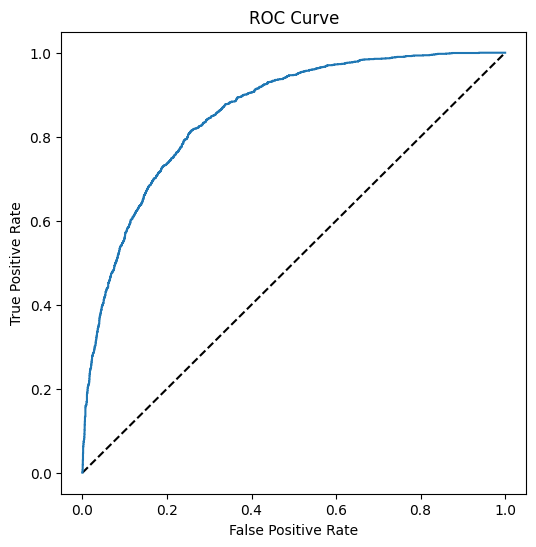

In [19]:
# ROC eğrisi ve karışıklık matrisi için gerekli fonksiyonları alıyoruz
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Grafik çizimi için matplotlib kütüphanesini ekle
import matplotlib
import matplotlib.pyplot as plt

# Jupyter defterinde grafikleri anında göster
%matplotlib inline

# ROC eğrisi için false positive rate (fpr), true positive rate (tpr) ve eşik değerlerini hesapla
# y_scores[:, 1] → pozitif sınıfın olasılık skorları (1. sınıfa ait olma ihtimali)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# Grafik boyutunu ayarla
fig = plt.figure(figsize=(6, 6))

# Rastgele tahmin çizgisi (referans için), kesikli siyah çizgi
plt.plot([0, 1], [0, 1], 'k--')

# ROC eğrisini çiz (fpr x ekseni, tpr y ekseni)
plt.plot(fpr, tpr)

# Grafik etiketleri
plt.xlabel('False Positive Rate')  # Yanlış pozitif oranı
plt.ylabel('True Positive Rate')   # Doğru pozitif oranı (recall)

# Grafik başlığı
plt.title('ROC Curve')

# Grafiği göster
plt.show()

ROC grafiği, 0 ile 1 arasındaki farklı eşik (threshold) değerleri için **doğru pozitif oranı (True Positive Rate)** ile **yanlış pozitif oranı (False Positive Rate)** arasındaki eğriyi gösterir. Mükemmel bir sınıflandırıcı, grafikte sol kenardan dik bir şekilde yukarı çıkan ve ardından üst kenardan düz bir şekilde sağa giden bir eğriye sahip olurdu.

Grafiğin köşegen çizgisi (diyagonal) ise tamamen rastgele, yani %50/50 tahmin yapan bir modelin doğruluk oranını temsil eder — eğriniz bu çizginin üzerinde olmalıdır; aksi takdirde modeliniz sadece tahmin yürütmekten daha iyi değildir!

Eğrinin altındaki alan (*AUC - Area Under the Curve*), modelin genel başarımını sayısal olarak ifade eden 0 ile 1 arasında bir değerdir. Bu değer 1'e ne kadar yakınsa, model o kadar iyidir. Scikit-Learn bu metriği hesaplamak için **roc_auc_score** adlı bir fonksiyon sağlar.


In [20]:
# ROC eğrisi altında kalan alanı (AUC) hesaplamak için fonksiyonu alıyoruz
from sklearn.metrics import roc_auc_score

# Pozitif sınıfa ait olma olasılıkları kullanılarak AUC hesaplanır
auc = roc_auc_score(y_test, y_scores[:, 1])

# AUC değerini yazdır
print(f"AUC: {auc}")

AUC: 0.8568639560573738


### Bir Pipeline İçinde Ön İşleme (Preprocessing) Uygulama

Bu durumda, ROC eğrisi ve AUC değeri, modelin rastgele tahminden daha iyi performans gösterdiğini ortaya koyuyor — bu da fena değil, çünkü veriye çok az ön işleme uyguladık.

Gerçek dünyada ise, algoritmanın veriye daha iyi uyum sağlayabilmesi için genellikle bazı ön işleme (preprocessing) adımları uygulanır. Modellemeye hazır bir veri elde etmek için uygulanabilecek çok sayıda dönüşüm işlemi vardır; ancak biz burada birkaç yaygın tekniğe odaklanacağız:

- **Sayısal özellikleri aynı ölçeğe getirmek (scaling):** Bu, büyük değere sahip özelliklerin tahminleri orantısız şekilde etkilemesini önler.
- **Kategorik değişkenleri dönüştürmek (encoding):** Örneğin, *one-hot encoding* tekniği kullanılarak her bir kategori değeri için ayrı ayrı ikili (doğru/yanlış) özellikler oluşturulabilir.

Bu ön işleme dönüşümlerini uygulamak için, Scikit-Learn'deki *pipeline* özelliğinden faydalanacağız. Pipelines (işlem hatları), bir dizi ön işleme adımını ve son adımda bir algoritmayı tanımlamamıza olanak tanır. Daha sonra bu pipeline’ı doğrudan veriye uygulayabiliriz; böylece model, tüm ön işleme adımlarını ve sınıflandırma algoritmasını kapsayan bir yapı haline gelir.

Bu oldukça faydalıdır çünkü modelimizi daha sonra yeni veriler üzerinde kullanmak istediğimizde, eğitim verisiyle kullanılan aynı istatistiksel dönüşümler ve aynı kategori kodlamaları ile veriyi dönüştürmemiz gerekir.

> **Not:** *Pipeline* terimi makine öğrenmesinde çok sık kullanılır ve farklı bağlamlarda farklı anlamlara gelebilir. Bu bağlamda, Scikit-Learn kütüphanesindeki `pipeline` nesnelerini ifade ediyoruz.


In [21]:
# Veriyi dönüştürmek ve modeli birleştirmek için gereken sklearn modülleri
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Sayısal özelliklerin indeksleri (0-6)
numeric_features = [0, 1, 2, 3, 4, 5, 6]

# Sayısal veriyi standartlaştırmak için pipeline oluşturduk
# StandardScaler → veriyi ortalaması 0, standart sapması 1 olacak şekilde dönüştürür
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Kategorik özelliğin indeksi (7)
categorical_features = [7]

# Kategorik veriyi OneHotEncoder ile dönüştürme pipeline'ı
# handle_unknown='ignore' bilinmeyen kategorileri yok sayar
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Sayısal ve kategorik dönüşümleri bir araya getiren ColumnTransformer
# 'num' kısmı sayısal sütunları, 'cat' kısmı kategorik sütunları işler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tüm işlemi birleştiren pipeline:
# önce veriyi dönüştür, sonra lojistik regresyonla sınıflandır
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=1/reg, solver="liblinear"))])

# Modeli eğitim verisi ile eğit
model = pipeline.fit(X_train, y_train)

# Eğitilmiş modeli yazdır (özet bilgi verir)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('classifier',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Bu pipeline (işlem hattı), ön işleme adımlarını ve model eğitimini tek bir yapı içinde kapsar.

Şimdi, bu pipeline tarafından eğitilen modeli kullanarak test veri kümesindeki etiketleri tahmin edelim ve bu modelin başarı metriklerini, önceki adımlarda oluşturduğumuz temel model ile karşılaştıralım.


Confusion Matrix:
[[2667  319]
 [ 406 1108]]

Accuracy: 0.8388888888888889

Overall Precision: 0.7764540995094604

Overall Recall: 0.7318361955085865

AUC: 0.9202433903349936


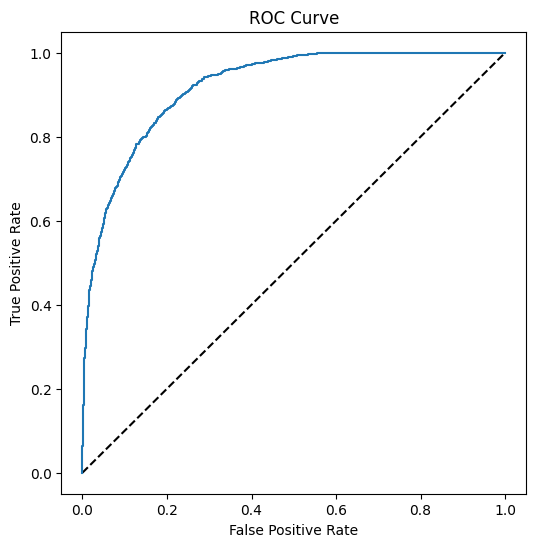

In [22]:
# Test verisi için sınıf tahminleri yap
pred = model.predict(X_test)

# Test verisi için sınıfa ait olma olasılıklarını tahmin et
y_scores = model.predict_proba(X_test)

# Karmaşıklık matrisini hesapla (gerçek vs tahmin)
cm = confusion_matrix(y_test, pred)

# Karmaşıklık matrisini yazdır
print(f"Confusion Matrix:\n{cm}\n")

# Doğruluk oranını hesapla ve yazdır
print(f"Accuracy: {accuracy_score(y_test, pred)}\n")

# Kesinlik (precision) skorunu hesapla ve yazdır
print(f"Overall Precision: {precision_score(y_test, pred)}\n")

# Duyarlılık (recall) skorunu hesapla ve yazdır
print(f"Overall Recall: {recall_score(y_test, pred)}\n")

# ROC eğrisi altındaki alanı (AUC) hesapla ve yazdır
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC: {auc}")

# ROC eğrisi için yanlış pozitif oranı (fpr), doğru pozitif oranı (tpr) ve eşik değerlerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# Grafik boyutunu ayarla
fig = plt.figure(figsize=(6, 6))

# Rastgele tahmin için referans çizgisi (kesişen çizgi)
plt.plot([0, 1], [0, 1], 'k--')

# ROC eğrisini çiz
plt.plot(fpr, tpr)

# Grafik etiketleri
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Grafik başlığı
plt.title('ROC Curve')

# Grafik göster
plt.show()

Sonuçlar biraz daha iyi görünüyor, yani veriye ön işleme uygulamamızın gerçekten bir fark yarattığı açık.

### Farklı Bir Algoritma Deneyelim (Try a Different Algorithm)

Şimdi farklı bir algoritma deneyelim. Daha önce *lojistik regresyon* algoritmasını kullanmıştık, bu bir *lineer* (doğrusal) algoritmadır. Deneyebileceğimiz birçok sınıflandırma algoritması vardır, örneğin:

- **Destek Vektör Makineleri (Support Vector Machine - SVM) algoritmaları**: Sınıfları ayıran bir *hiperdüzlem (hyperplane)* tanımlarlar.
- **Ağaç tabanlı algoritmalar**: Tahminlere ulaşmak için karar ağacı (decision tree) oluştururlar.
- **Topluluk (ensemble) algoritmaları**: Birden çok temel algoritmanın çıktısını birleştirerek genellenebilirliği artırırlar.

Bu sefer, öncekiyle aynı ön işleme adımlarını kullanacağız; fakat modeli *Random Forest* adlı bir *ensemble (topluluk)* algoritması ile eğiteceğiz. Bu algoritma, birden çok rastgele karar ağacının çıktısını birleştirir. Daha fazla bilgi için [Scikit-Learn belgelerine](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) göz atabilirsiniz.


In [23]:
# Rastgele Orman sınıflandırıcısını sklearn'den alıyoruz
from sklearn.ensemble import RandomForestClassifier

# Pipeline oluşturuyoruz:
# Önce veriyi ön işleme (sayısal/kategorik dönüşüm) tabi tut
# Sonra RandomForestClassifier ile sınıflandırma yap
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

# Modeli eğitim verisi ile eğit
model = pipeline.fit(X_train, y_train)

# Model bilgisini yazdır
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('classifier', RandomForestClassifier(random_state=0))])


Şimdi, yeni modelin performans metriklerine bakalım.


Confusion Matrix:
[[2856  130]
 [ 170 1344]]

Accuracy: 0.9333333333333333

Overall Precision: 0.9118046132971506

Overall Recall: 0.8877146631439894

AUC: 0.9823873142918826


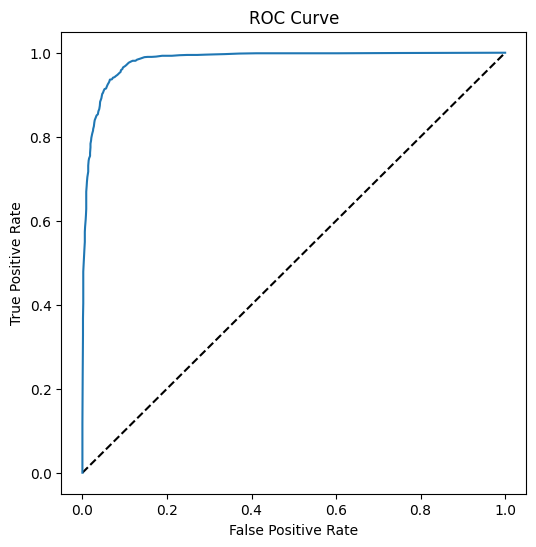

In [24]:
# Test verisi için sınıf tahminleri yap
pred = model.predict(X_test)

# Test verisi için sınıfa ait olma olasılıklarını tahmin et
y_scores = model.predict_proba(X_test)

# Gerçek ve tahmin edilen değerlerden karmaşıklık matrisini oluştur
cm = confusion_matrix(y_test, pred)

# Karmaşıklık matrisini yazdır
print(f"Confusion Matrix:\n{cm}\n")

# Doğruluk oranını hesapla ve yazdır
print(f"Accuracy: {accuracy_score(y_test, pred)}\n")

# Kesinlik (precision) skorunu hesapla ve yazdır
print(f"Overall Precision: {precision_score(y_test, pred)}\n")

# Duyarlılık (recall) skorunu hesapla ve yazdır
print(f"Overall Recall: {recall_score(y_test, pred)}\n")

# ROC eğrisi altındaki alanı (AUC) hesapla ve yazdır
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC: {auc}")

# ROC eğrisi için false positive rate (fpr), true positive rate (tpr) ve eşik değerlerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# Grafik boyutunu ayarla
fig = plt.figure(figsize=(6, 6))

# Rastgele tahmin için referans çizgisi (kesişen çizgi)
plt.plot([0, 1], [0, 1], 'k--')

# ROC eğrisini çiz (fpr x ekseninde, tpr y ekseninde)
plt.plot(fpr, tpr)

# Grafik etiketleri
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Grafik başlığı
plt.title('ROC Curve')

# Grafiği göster
plt.show()

Bu daha iyi görünüyor!

### Modeli Çıkarım (Inferencing) İçin Kullanmak
Artık elimizde oldukça işe yarar, eğitilmiş bir model olduğuna göre, bu modeli daha sonra yeni veriler için etiket tahmini yapmak amacıyla kaydedebiliriz.


In [25]:
# joblib kütüphanesi modeli dosyaya kaydetmek için kullanılır
import joblib

# Modeli 'diabetes_model.pkl' adlı dosyaya kaydet
filename = 'diabetes_model.pkl'
joblib.dump(model, filename)

['diabetes_model.pkl']

Yeni ve etiketleri bilinmeyen bazı gözlemlerimiz olduğunda, daha önce kaydettiğimiz modelimizi yükleyebilir ve bu yeni veriler için etiket tahminleri yapmak amacıyla kullanabiliriz.


In [26]:
# Dosyadan modeli yükle
model = joblib.load(filename)

# Yeni bir örnek üzerinde tahmin yap
# Model, birden fazla hastanın sınıflarını tek bir çağrıyla tahmin edebilmek için özellik dizilerinden oluşan bir dizi kabul eder
# Burada, bir hastayı temsil eden tek bir özellik dizisi içeren bir dizi oluşturacağız
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('Yeni örnek: {}'.format(list(X_new[0])))

# Tahmin al
pred = model.predict(X_new)

# Model, gönderilen her bir özellik kümesi için bir tahmin döndürür – 
# Biz yalnızca bir hasta gönderdiğimiz için, tahmin sonucu dizisindeki ilk öğe bizim sonucumuz olacak
print('Tahmin edilen sınıf: {}'.format(pred[0]))


Yeni örnek: [np.float64(2.0), np.float64(180.0), np.float64(74.0), np.float64(24.0), np.float64(21.0), np.float64(23.9091702), np.float64(1.488172308), np.float64(22.0)]
Tahmin edilen sınıf: 1
